In [2]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
x = 6 * np.random.rand(100, 1) - 3
y = 0.5 * x**2 + 1.5*x + 2 + np.random.rand(100, 1)  #ax2+bx+c=0    

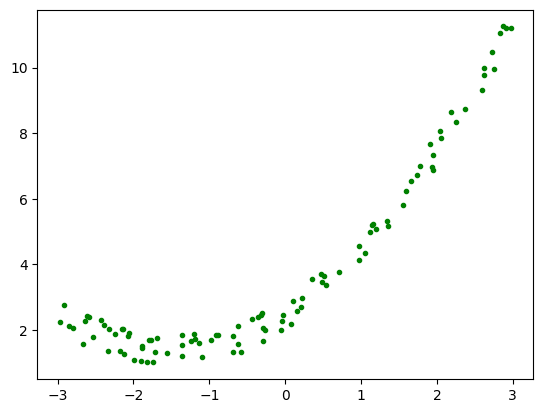

In [4]:
plt.scatter(x, y, color='green', marker='.')

In [5]:
# training and testing split

from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [7]:
# implement simple linear regression

from sklearn.linear_model import LinearRegression

In [8]:
regression = LinearRegression()

In [9]:
regression.fit(x_train, y_train)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score

In [17]:
score = r2_score(y_test, regression.predict(x_test))
score

0.793167353662155

Text(0, 0.5, 'y_train')

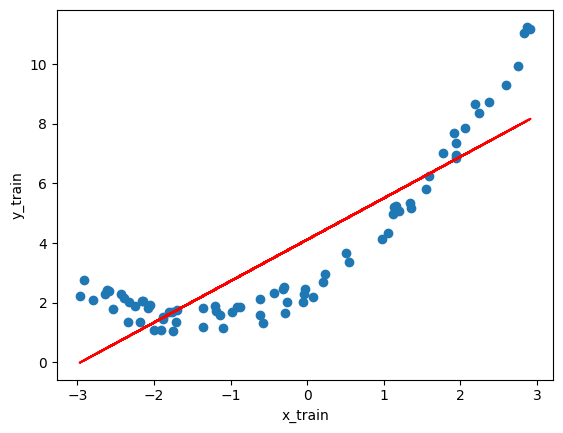

In [12]:
# lets visualize the model

plt.plot(x_train, regression.predict(x_train), color='red')
plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')

In [13]:
# apply polynomial regression

from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# if degree is 2

poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [ ]:
x_train_poly

In [ ]:
x_test_poly

In [18]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly, y_train)
y_pred = regression.predict(x_test_poly)
score = r2_score(y_test, y_pred)
score

0.9917798289541281

In [19]:
regression.coef_

array([[0.        , 1.46925205, 0.51045982]])

In [20]:
regression.intercept_

array([2.5156906])

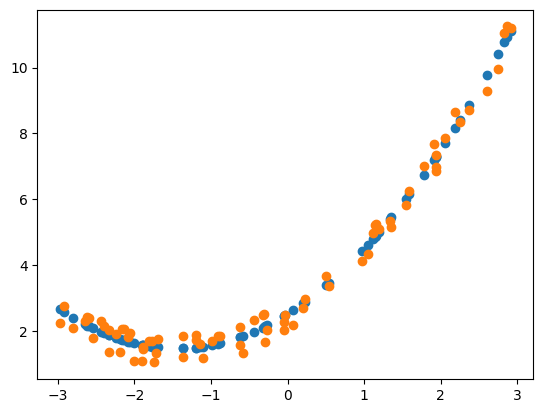

In [22]:
plt.scatter(x_train, regression.predict(x_train_poly))
plt.scatter(x_train, y_train)

In [23]:
# if degree is 3

poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [24]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly, y_train)
y_pred = regression.predict(x_test_poly)
score = r2_score(y_test, y_pred)
score

0.9916679950952131

In [26]:
# prediction of new data

x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

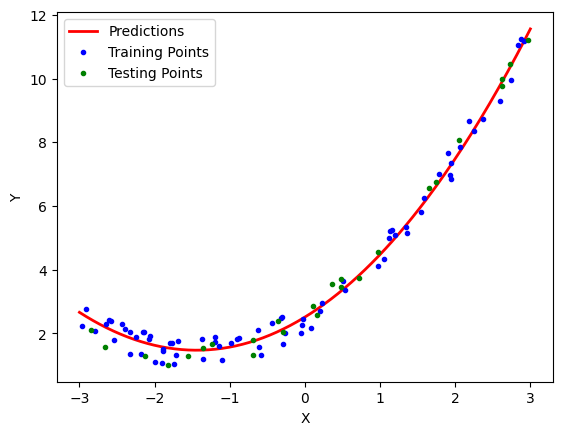

In [29]:
y_new = regression.predict(x_new_poly)
plt.plot(x_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.plot(x_train, y_train, 'b.', label='Training Points')
plt.plot(x_test, y_test, 'g.', label='Testing Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### Pipeline in Polynomials

In [30]:
from sklearn.pipeline import Pipeline

In [42]:
def poly_regression(degree):
    x_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(x_new)
    #plotting prediction line
    plt.plot(x_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

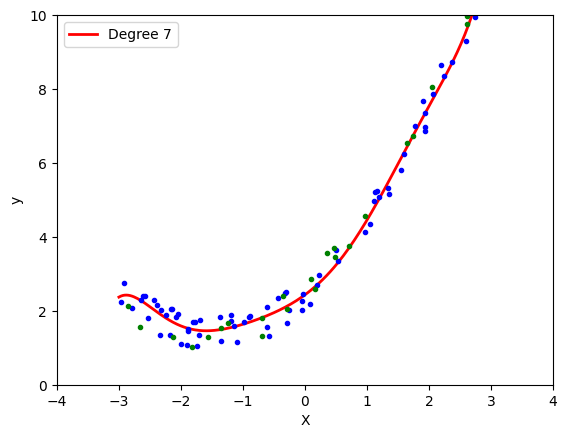

In [47]:
poly_regression(7)